In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_csv("../titanic/train.csv")
test=pd.read_csv("../titanic/test.csv")

In [6]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
print("plcass unique",train.Pclass.unique())
print("SibSp unique",train.SibSp.unique())
print("parch unique",train.Parch.unique())
print("Cabin unique",train.Cabin.unique())

plcass unique [3 1 2]
SibSp unique [1 0 3 4 2 5 8]
parch unique [0 1 2 5 3 4 6]
Cabin unique [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' '

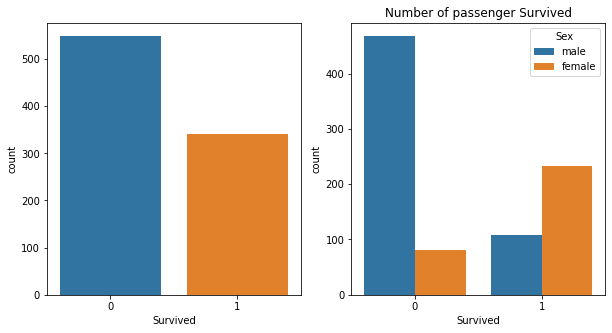

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(train.Survived)
plt.subplot(1,2,2)
sns.countplot(x="Survived",hue="Sex",data=train)
plt.title('Number of passenger Survived');

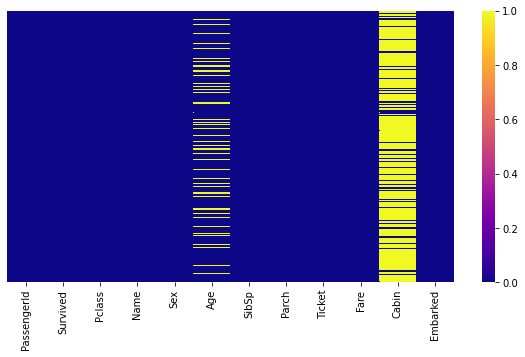

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(),yticklabels=False,cmap="plasma")

In [22]:
train['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [24]:
train.shape

(891, 12)

In [31]:
def bar(feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.countplot(train[feature])
    plt.subplot(1,2,2)
    sns.countplot(x="Survived",hue=feature,data=train)

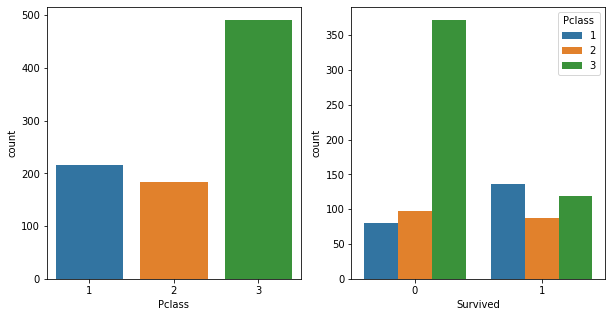

In [32]:
bar("Pclass")

In [39]:
pclass1=train[train.Pclass==1]['Survived'].value_counts(normalize=True).values[0]*100;
pclass2=train[train.Pclass==2]['Survived'].value_counts(normalize=True).values[1]*100;
pclass3=train[train.Pclass==3]['Survived'].value_counts(normalize=True).values[1]*100;
print("Pclaas-1: {:.1f}% People Survived".format(pclass1))
print("Pclaas-2: {:.1f}% People Survived".format(pclass2))
print("Pclaas-3: {:.1f}% People Survived".format(pclass3))

Pclaas-1: 63.0% People Survived
Pclaas-2: 47.3% People Survived
Pclaas-3: 24.2% People Survived


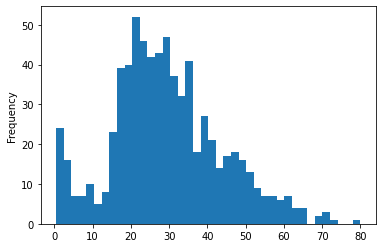

In [45]:
train.Age.plot(kind='hist',bins=40)

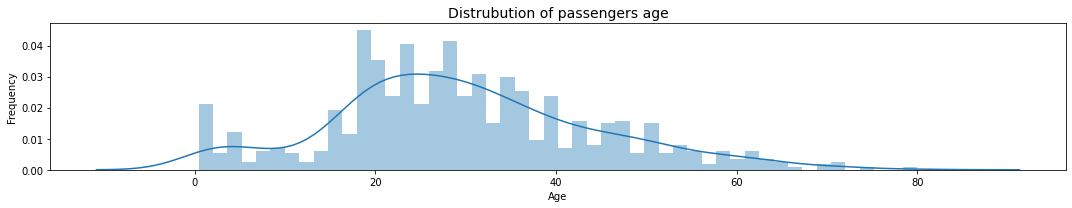

In [51]:
plt.figure(figsize=(15, 3))
sns.distplot(train[(train["Age"] > 0)].Age, bins = 50)
plt.title('Distrubution of passengers age',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()

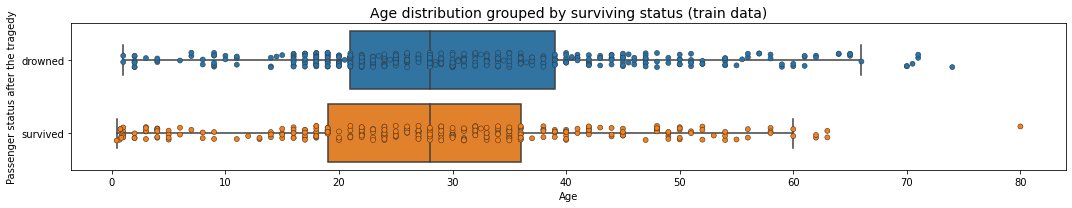

In [59]:
plt.figure(figsize=(15, 3))
sns.boxplot(y = 'Survived', x = 'Age', data = train, fliersize = 0, orient = 'h')
sns.stripplot(y = 'Survived', x = 'Age', data = train, linewidth = 0.6, orient = 'h')

plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()

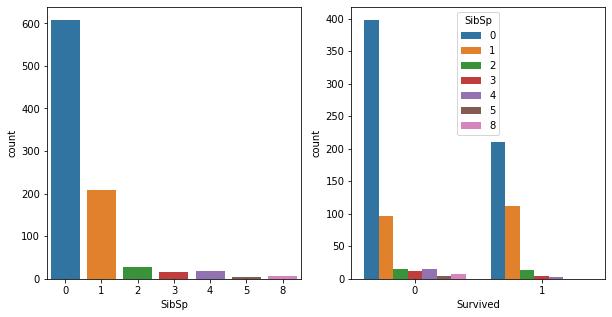

In [60]:
bar("SibSp")

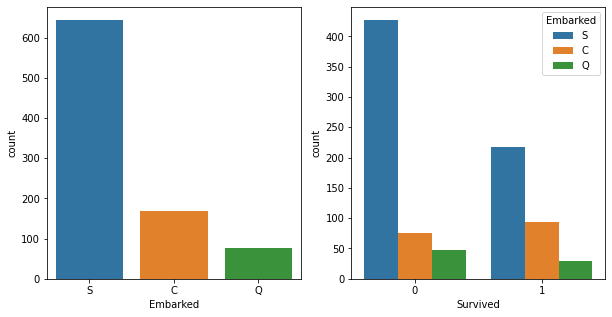

In [61]:
bar("Embarked")

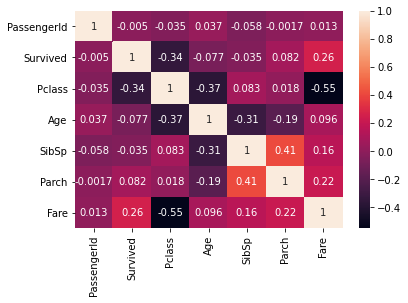

In [62]:
sns.heatmap(train.corr(),annot=True)

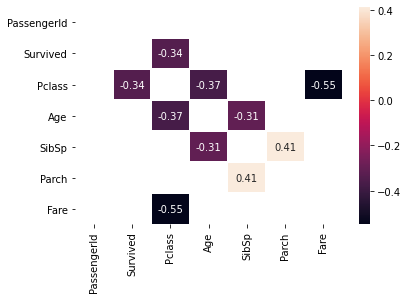

In [65]:
corr=train.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')

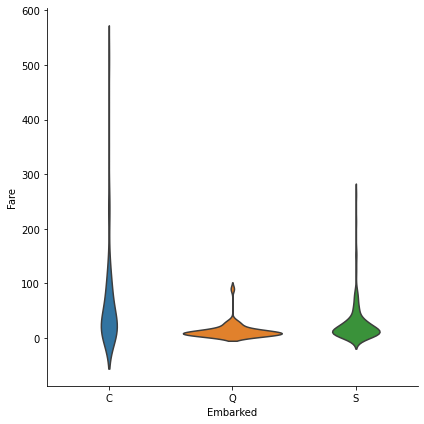

In [68]:
sns.catplot(x='Embarked',y="Fare",kind="violin",inner=None,data=train, height=6, order=['C','Q','S'])

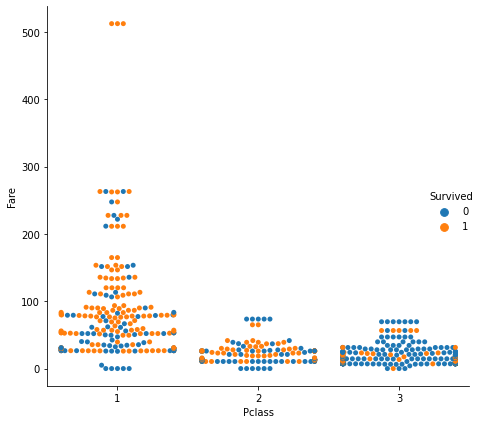

In [78]:
sns.catplot(x='Pclass',y="Fare",height=6, hue="Survived",data=train,kind='swarm')
plt.tight_layout()

In [79]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#https://www.kaggle.com/harshkothari21/100-accurate-results-with-eda-all-ml-models